<a href="https://colab.research.google.com/github/AllyHyeseongKim/CAU13601_Algorithms/blob/feature%2Fassignment04/assignment04/Tensorflow_mnist_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment04: Open Source SW Project (Deep Learning) - Tensorflow MNIST example

## Import libraries

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

## Get MNIST dataset

`MNIST` data located in `tensorflow > keras > datasets > mnist`. \\
`Split data` to (`train images`, `train labels`) and (`test images`, `test labels`)

In [0]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

There are total `60000` `train images` and `train labels`. (60000 images for single class) \\
Shape of single image is `28x28` (pixel).

In [5]:
print('Shape of Train Images: ', train_images.shape)
print('Shape of Train Labels: ', train_labels.shape)
print()
print('Shape of Test Images: ', test_images.shape)
print('Shape of Test Label: ', test_labels.shape)

Shape of Train Images:  (60000, 28, 28)
Shape of Train Labels:  (60000,)

Shape of Test Images:  (10000, 28, 28)
Shape of Test Label:  (10000,)


In [6]:
print('Train Labels: ', train_labels)

Train Labels:  [5 0 4 ... 5 6 8]


## Plot the first train image

When the `value of the image data` is close to `0`: `dark`. \\
When the `value of the image data` is close to `255`: `white`. \\
Print the example of the data of the `first train image data`.

In [7]:
print(train_images[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

Plot the `first 10 train images` and `corresponding labels`.

First 10 Train Images in MNIST Datasets



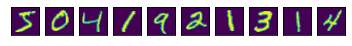


Train labels match with train label sequentialy.
[5 0 4 1 9 2 1 3 1 4]


In [10]:
print('First 10 Train Images in MNIST Datasets')
print()

for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
plt.show()

print()
print('Train labels match with train label sequentialy.')
print(train_labels[:10])